In [ ]:
#########################################################
# Author: A. Alsema
# Date: May 2022
# Dataset: Visium Spatial Transcriptomics for MS lesions, slices with WM 
# Purpose: compute distance to (lesion) center, per section.
# Output: csv file with barcodes and distance info, one file per sample. 
# Note: Corresponding output can be found under /data_files/figure 3 spacex/Coordinates per sample/

# Required Inputs: 
# - center spot barcode: manually selected and written down by using seurat interactive = TRUE, SpatialDimPlot.
# - seu: seurat object containing all samples with spatial information and subgroup information in the metadata
# - outdir: location to store csv files
#########################################################

In [1]:
rm(list = ls())
library(Seurat)
outdir = "/data_files/figure 3 spacex/Coordinates per sample/"

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [21]:
#' Compute Euclidean Distance to Lesion Core
#'
#' This function computes the Euclidean distance from a specified center point to all tissue coordinates in a section. 
#' The distances are then exported to a CSV file.
#'
#' @param seurat A Seurat object containing spatial data.
#' @param sample_name A string representing the sample name.
#' @param current.image The corresponding image name stored in the Seurat object. 
#' @param center_point The center spot barcode used as the origin for distance calculation.
#' @return A data frame of tissue coordinates with computed distances.
#' @export
#' @examples
#' # Example usage:
#' coordinates_and_distance <- computedistance(seu2, sample_name = "A1",current.image = "section3", center_point = "TAAGGCAACATAAGAT-1_3")

computedistance <- function(seurat, sample_name, current.image, center_point) {
    # image = one image, important to select the sample!
  coor <- GetTissueCoordinates(seurat, image = current.image) 
    # otherwise the tissue section is upside down
  coor$imagerow <- coor$imagerow * -1 
    #  quick print to check the shape of the section is correct
  print(plot(coor$imagecol, coor$imagerow)) 

    # define the center point 
  origin <- coor[(row.names(coor) == center_point), ]

    # calculate euclidean distance between the point of origin and the moving point X
  euclidean <- function(x, new_origin) {
    distance = sqrt(sum((x - new_origin)^2))
    return(distance)
  }
  coor$distance = apply(coor, 1, euclidean, new_origin = origin)
  
  # export the coordinates and distance to origin as csv
  write.csv(coor, file = paste0(outdir, sample_name, "distance_to_lesioncore.csv"))

  return(coor)
}

#' Add Distance Information to Seurat Object
#'
#' This function adds the computed distance information to the metadata of a Seurat object.
#'
#' @param seurat A Seurat object containing spatial data.
#' @param coordinates A data frame of tissue coordinates with computed distances.
#' @return The Seurat object with updated metadata including distances.
#' @export
#' @examples
#' # Example usage:
#' # seurat_obj <- addtoSeurat(seurat_obj, coor)

addtoSeurat <- function(seurat, coordinates) {
  # add distance info to the seurat object
  seurat$distance[match(row.names(coordinates), row.names(seurat@meta.data))] <- as.numeric(coordinates$distance)
  return(seurat)
}


In [2]:
# load data
seu <- readRDS("RData/seurat/2-1.WM_integrated_scaled_subgroup.rds")
dim(seu)
# remove spots belonging to subgroup GM and lowUMI clusters
seu2 <- seu[, !is.na(seu$subgroup)] 
dim(seu2)

[1]  4000 60102

[1]  4000 57021

[1] "C1"
NULL
[1] "C2"


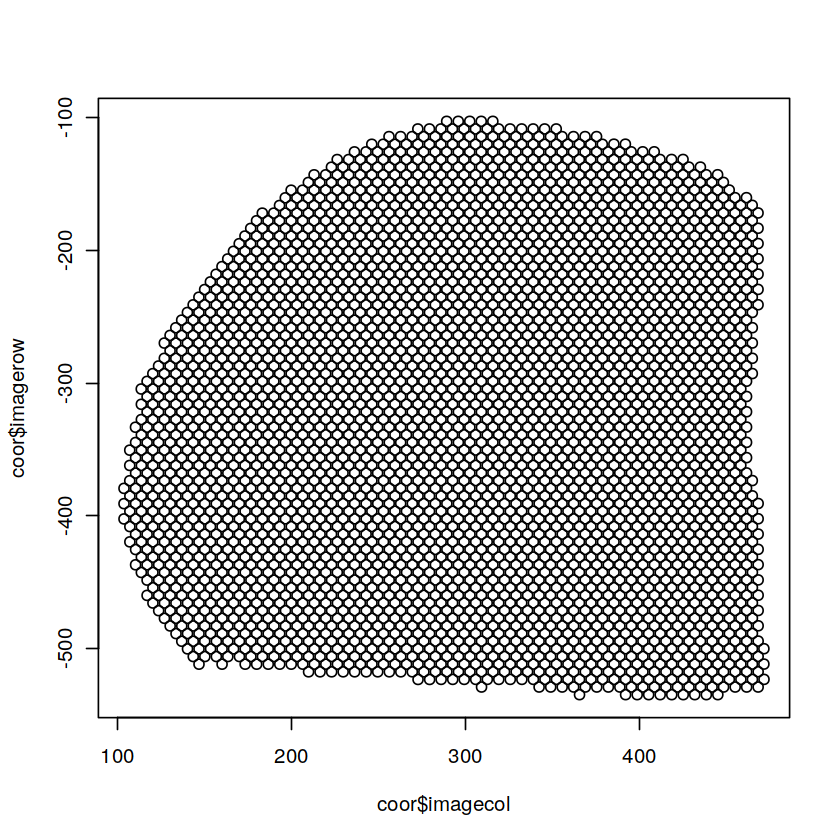

NULL
[1] "N1"


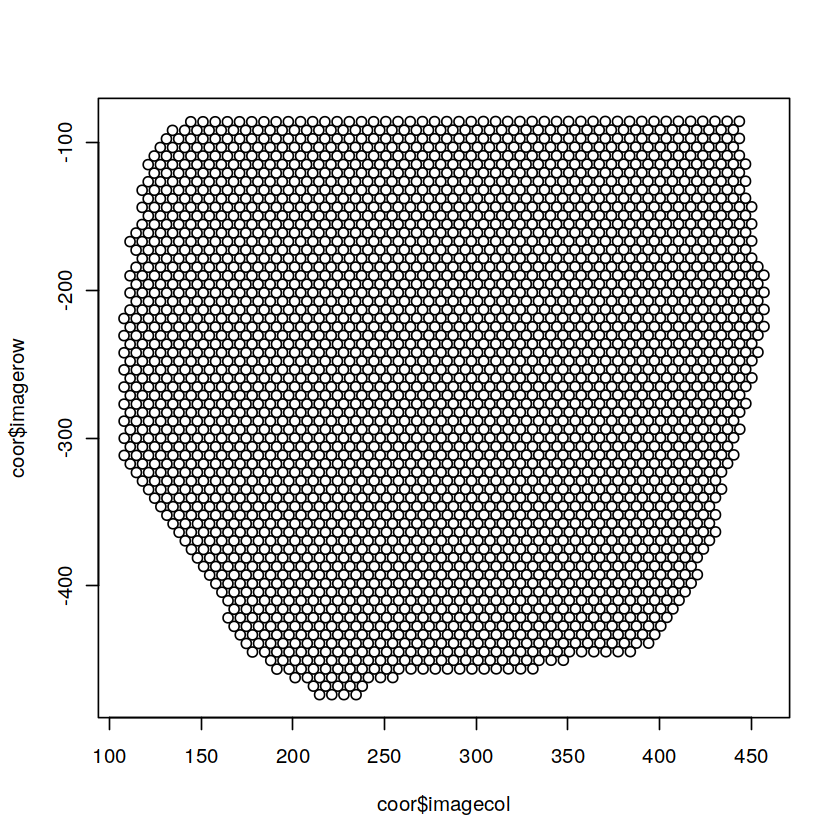

NULL
[1] "N2"


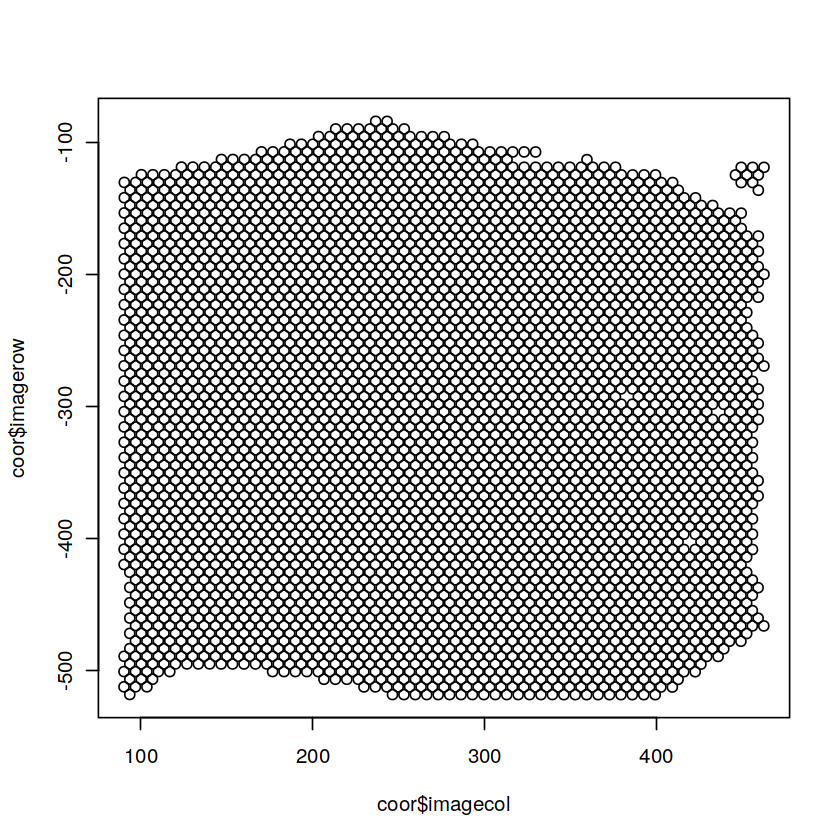

NULL
[1] "N3"


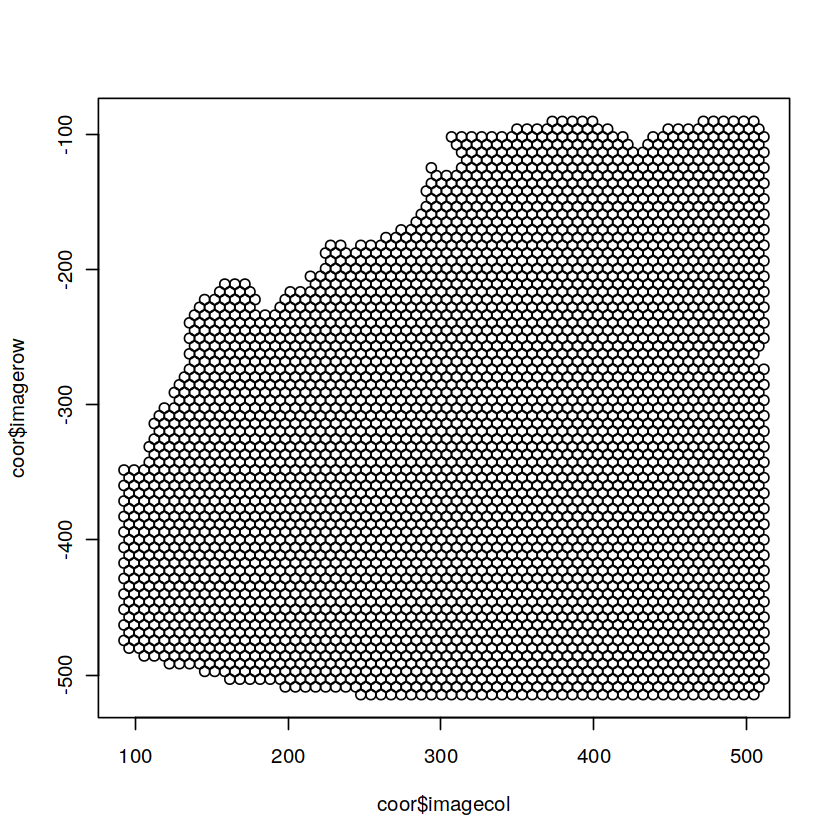

NULL
[1] "A1"


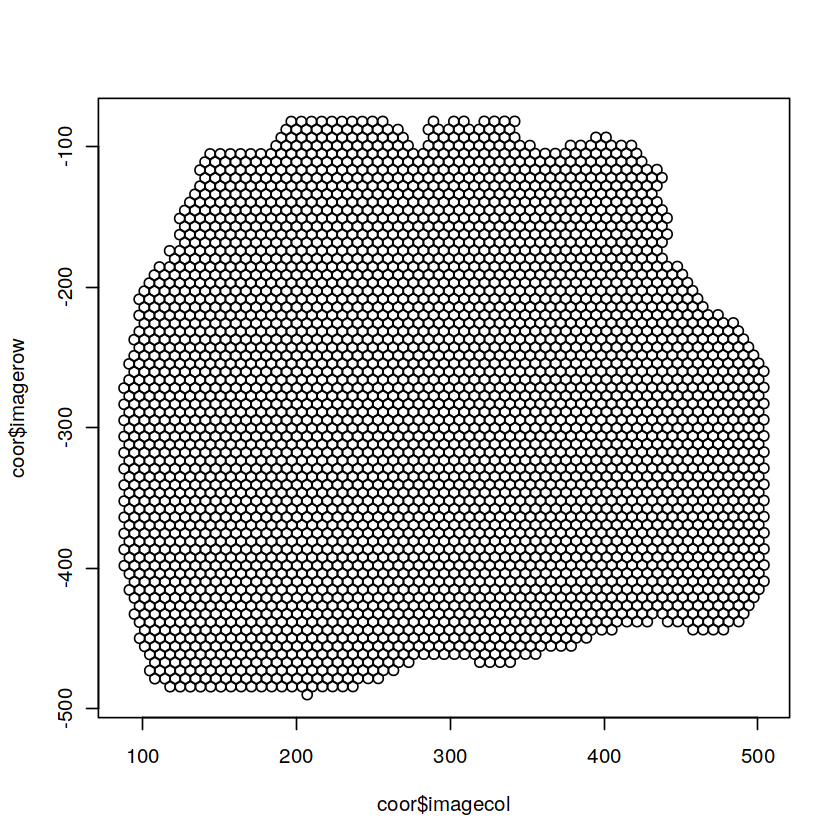

NULL
[1] "A2"


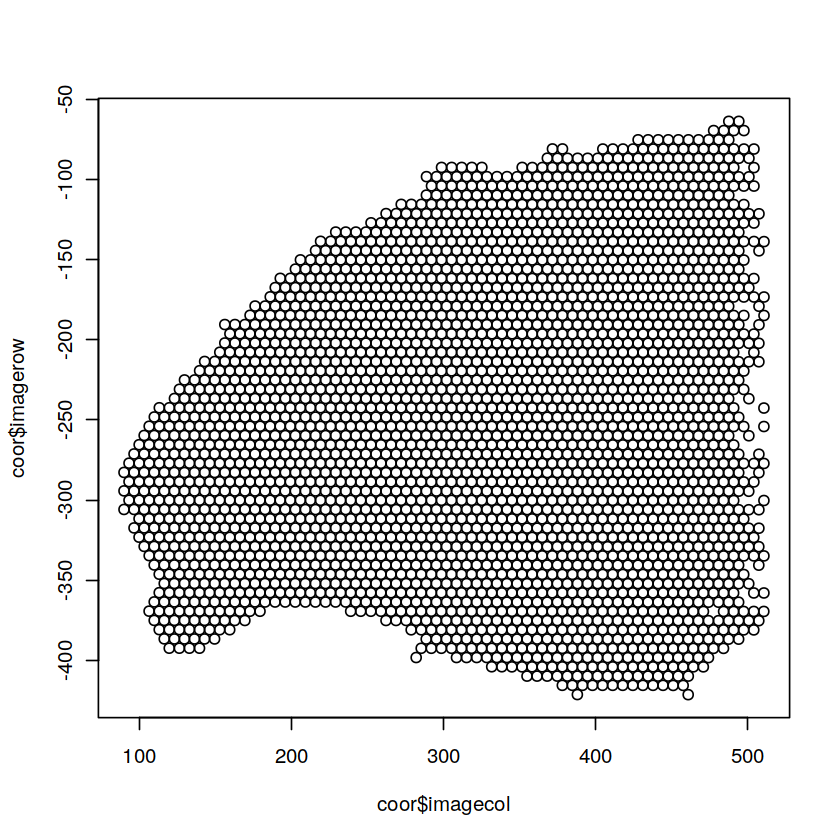

NULL
[1] "A3"


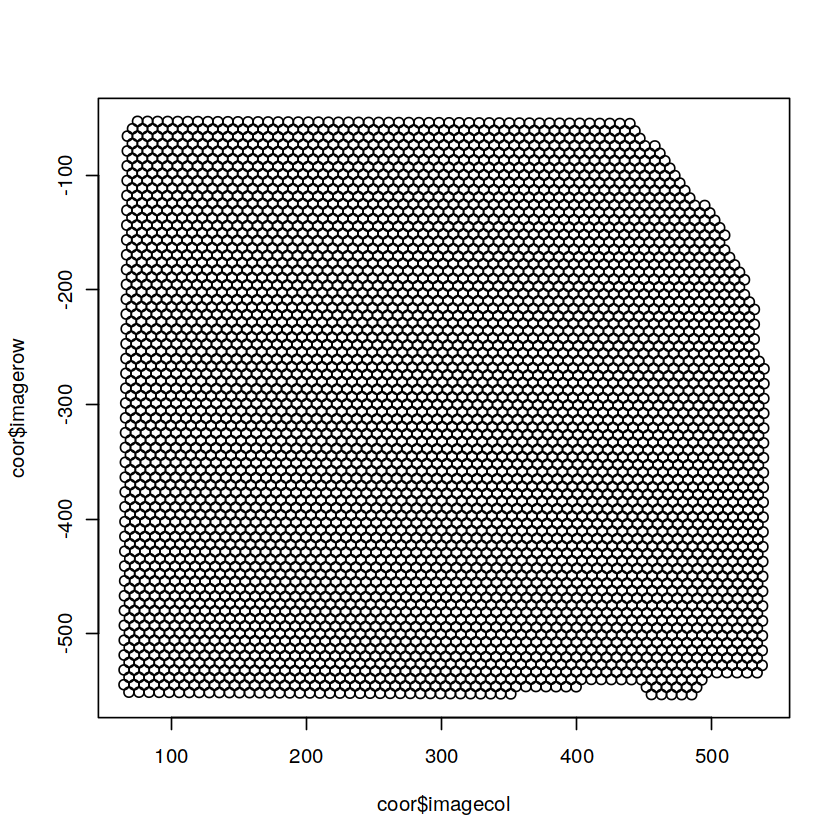

NULL
[1] "A4"


NULL
[1] "M1"


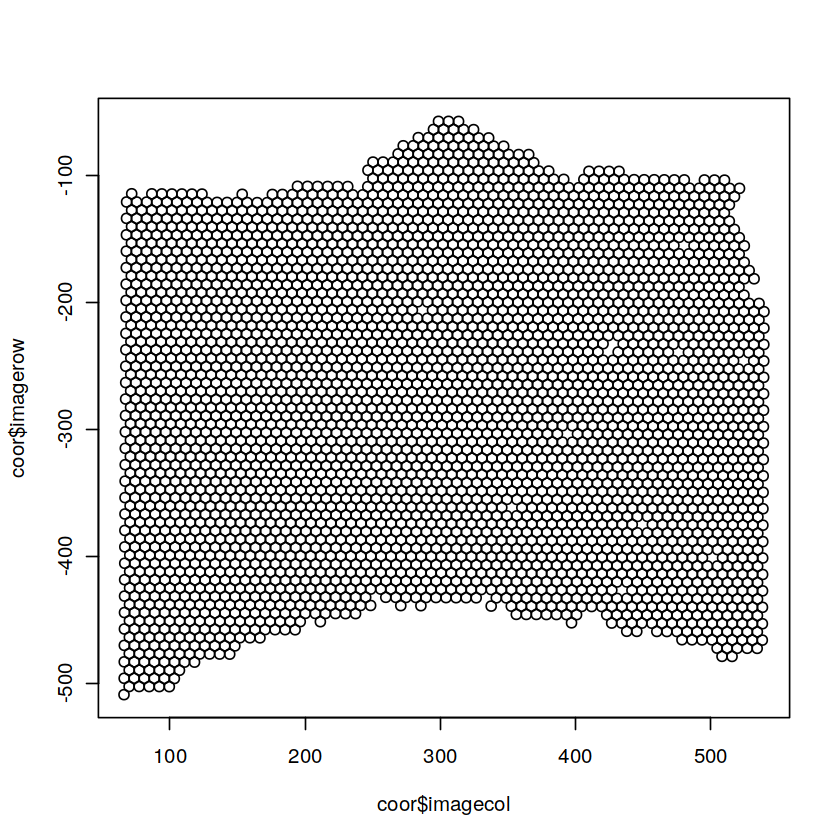

NULL
[1] "M2"


NULL
[1] "M3"


NULL
[1] "M4"


NULL
[1] "M5"


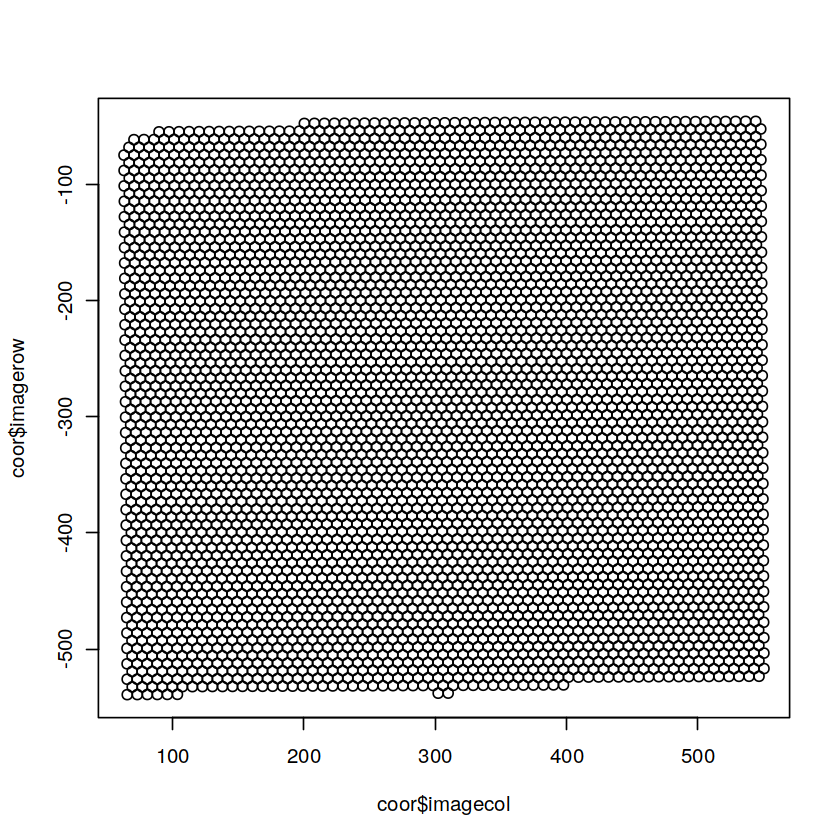

NULL
[1] "M6"


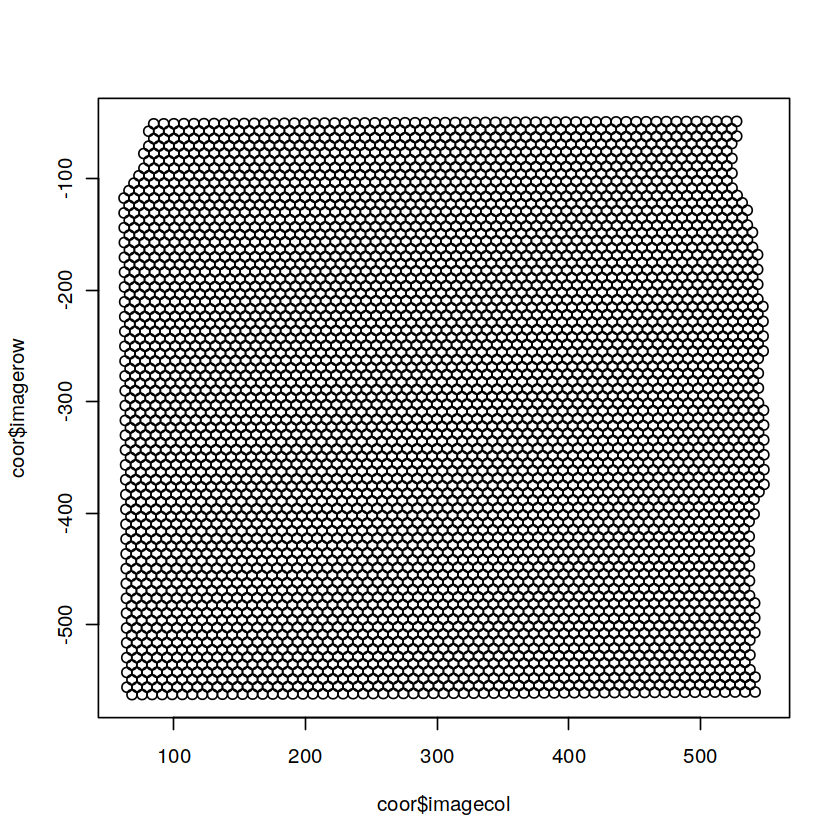

NULL


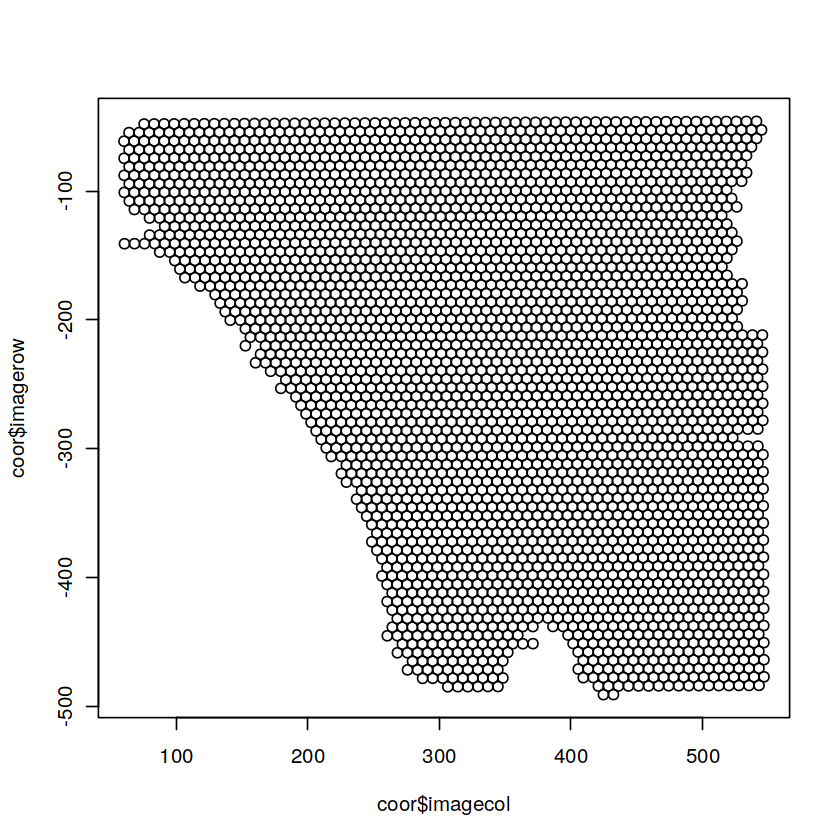

In [22]:
# create distance vector 
seu2$distance <- NA 

# control samples
coor_C1 <- computedistance(seu2, sample_name = "C1",current.image = "section1", center_point = "GAATCTGAACATTCTC-1_1")
seu3 <- addtoSeurat(seu2, coor_C1)
coor_C2 <- computedistance(seu2, sample_name = "C2",current.image = "section2", center_point = "ATATTTAACCCTCAAG-1_2")
seu3 <- addtoSeurat(seu3, coor_C2)
# NAWM samples
coor_N1 <- computedistance(seu2, sample_name = "N1",current.image = "section4", center_point = "TACATTTCTAACGTGC-1_4")
seu3 <- addtoSeurat(seu3, coor_N1)
coor_N2 <- computedistance(seu2, sample_name = "N2",current.image = "section5", center_point = "AGCGTGGTATTCTACT-1_5")
seu3 <- addtoSeurat(seu3, coor_N2)
coor_N3 <- computedistance(seu2, sample_name = "N3",current.image = "section6", center_point = "ATATCTTAGGGCCTTC-1_6")
seu3 <- addtoSeurat(seu3, coor_N3)
# active lesion samples
coor_A1 <- computedistance(seu2, sample_name = "A1",current.image = "section3", center_point = "TAAGGCAACATAAGAT-1_3")
seu3 <- addtoSeurat(seu3, coor_A1)
coor_A2 <- computedistance(seu2, sample_name = "A2",current.image = "section9", center_point = "GTCGTACCATCTCGGG-1_9")
seu3 <- addtoSeurat(seu3, coor_A2)
coor_A3 <- computedistance(seu2, sample_name = "A3",current.image = "section10", center_point = "CCGCCGTTGAGGATAA-1_10")
seu3 <- addtoSeurat(seu3, coor_A3)
coor_A4 <- computedistance(seu2, sample_name = "A4",current.image = "section15", center_point = "TCTTCGAATAGACGTT-1_15")
seu3 <- addtoSeurat(seu3, coor_A4)
# mix act/inact lesion samples
coor_M1 <- computedistance(seu2, sample_name = "M1",current.image = "section7", center_point = "CGAGAGATGTGAACCT-1_7")
seu3 <- addtoSeurat(seu3, coor_M1)
coor_M2 <- computedistance(seu2, sample_name = "M2",current.image = "section8", center_point = "GTGAGTGGTACAACGC-1_8")
seu3 <- addtoSeurat(seu3, coor_M2)
coor_M3 <- computedistance(seu2, sample_name = "M3",current.image = "section11", center_point = "GCGGAGAGGGAGAACG-1_11")
seu3 <- addtoSeurat(seu3, coor_M3)
coor_M4 <- computedistance(seu2, sample_name = "M4",current.image = "section14", center_point = "AGAGTGAACAGACACC-1_14")
seu3 <- addtoSeurat(seu3, coor_M4)
coor_M5 <- computedistance(seu2, sample_name = "M5",current.image = "section12", center_point = "CTCGGGCATCGTCGGG-1_12")
seu3 <- addtoSeurat(seu3, coor_M5)
coor_M6 <- computedistance(seu2, sample_name = "M6",current.image = "section13", center_point = "TGAAAGGACCTGACTC-1_13")
seu3 <- addtoSeurat(seu3, coor_M6)


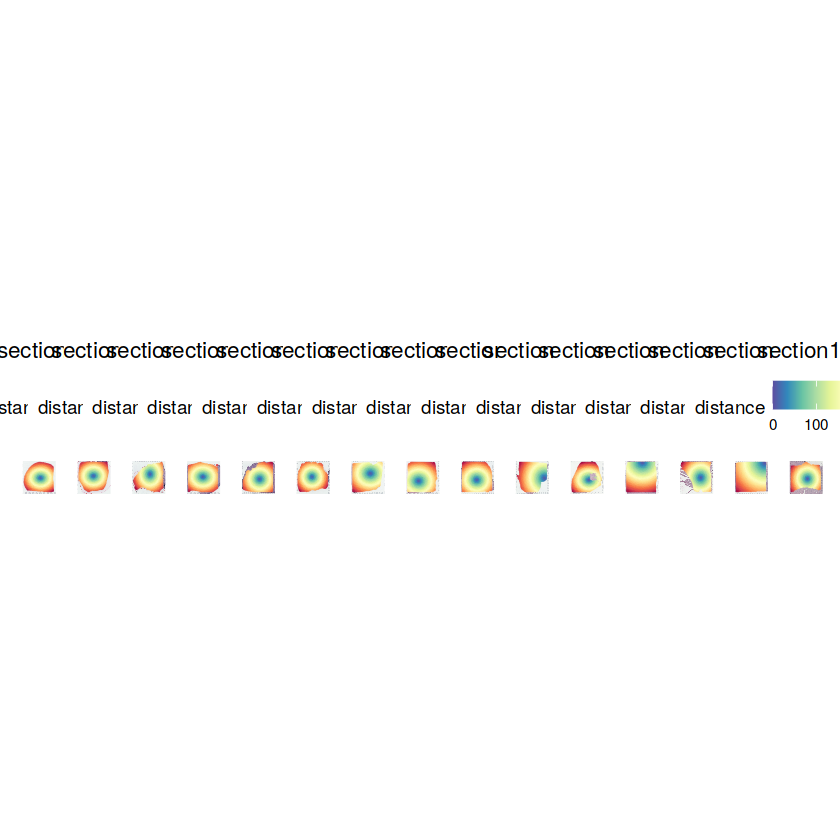

In [26]:
# plot as sanity check
SpatialFeaturePlot(seu3, feature ="distance", alpha =0.6, stroke = NA ) 